In [8]:
# Dataset
from sklearn.datasets import load_breast_cancer

# Model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Evaluation
from sklearn.metrics import confusion_matrix, classification_report

# Visualization
from sklearn.tree import plot_tree

import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Dataset
cancer = load_breast_cancer()
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df['target'] = cancer['target']
df['target_names'] = [cancer['target_names'][i] for i in cancer['target']]
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_names
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


In [10]:
df['target_names'].value_counts()

target_names
benign       357
malignant    212
Name: count, dtype: int64

In [11]:
# Model
X = df.drop(['target', 'target_names'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# criterion: gini or entropy
# max_depth: max depth of the tree
# min_samples_split: min number of samples required to split an internal node
dtree = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=5, random_state=101)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=5, random_state=101)

In [12]:
# Evaluation
predictions = dtree.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 59   7]
 [  3 102]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92        66
           1       0.94      0.97      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



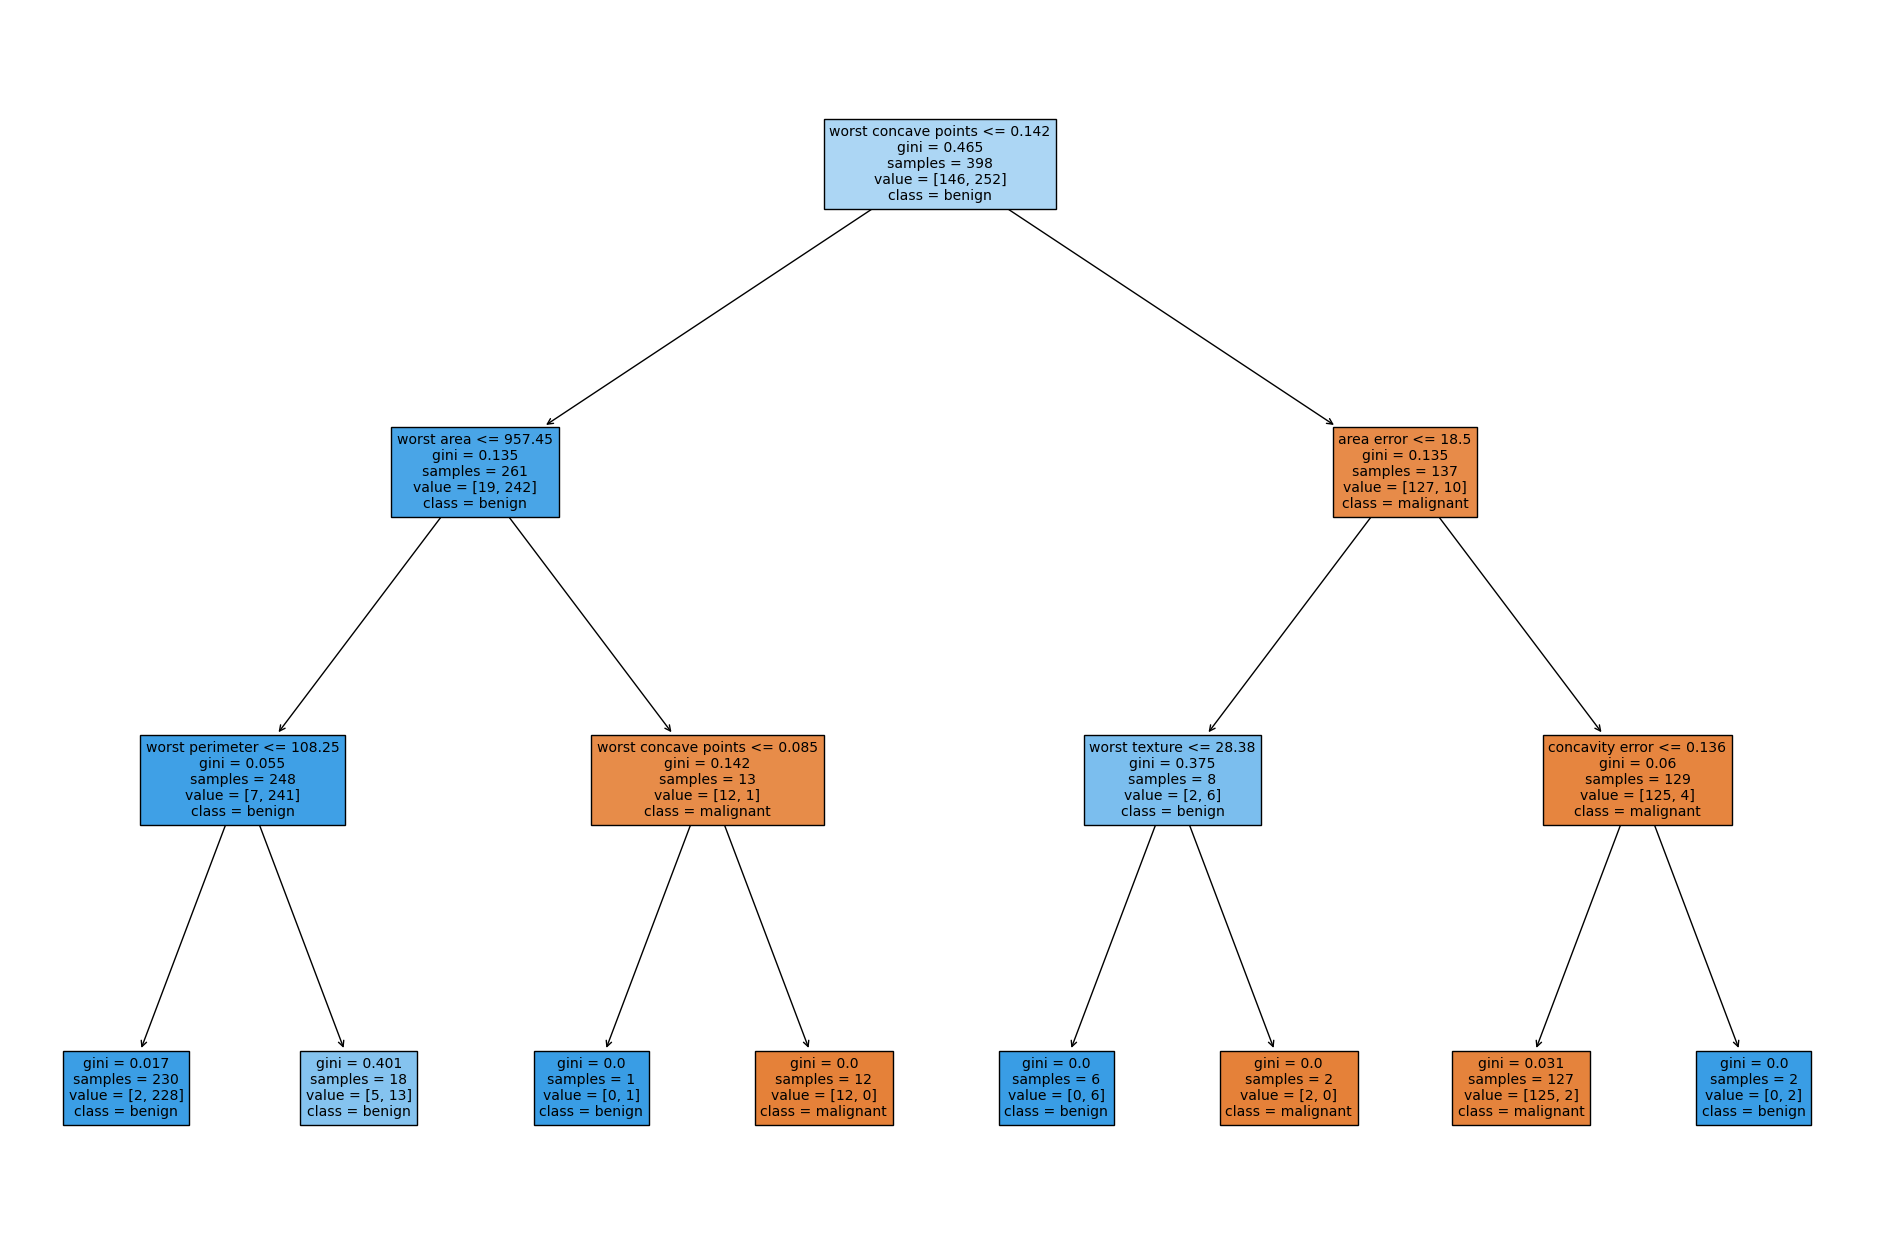

In [13]:
# Visualization
plt.figure(figsize=(24, 16))
plot_tree(dtree, filled=True, feature_names=X.columns, class_names=cancer['target_names'])
plt.show()

In [16]:
# Feature Importance
# The higher the value, the more important the feature

feature_imp = pd.Series(dtree.feature_importances_, index = X.columns).sort_values(ascending = False) 
feature_imp

worst concave points       0.783204
worst area                 0.116533
area error                 0.045878
concavity error            0.022472
worst texture              0.017672
worst perimeter            0.014240
mean radius                0.000000
worst symmetry             0.000000
worst concavity            0.000000
worst compactness          0.000000
worst smoothness           0.000000
worst radius               0.000000
fractal dimension error    0.000000
symmetry error             0.000000
concave points error       0.000000
compactness error          0.000000
mean texture               0.000000
smoothness error           0.000000
perimeter error            0.000000
texture error              0.000000
radius error               0.000000
mean fractal dimension     0.000000
mean symmetry              0.000000
mean concave points        0.000000
mean concavity             0.000000
mean compactness           0.000000
mean smoothness            0.000000
mean area                  0